In [63]:
# A decision tree exercise with 'Invistico_Airline.csv'
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df_original = pd.read_csv('C:\\Users\\Gebruiker\\Downloads\\Invistico_Airline.csv')

In [65]:
df_original.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,3,0,3,5,3,2,0,0.0,satisfied
1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,3,4,4,4,2,3,2,310,305.0,satisfied
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,3,3,4,4,4,2,0,0.0,satisfied
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,1,0,1,4,1,3,0,0.0,satisfied
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,2,0,2,4,2,5,0,0.0,satisfied
5,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,5,4,5,5,4,2,0,0.0,satisfied
6,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,0,5,5,5,3,17,15.0,satisfied
7,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,3,3,4,5,4,2,0,0.0,satisfied
8,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,4,4,0,1,5,4,4,0,0.0,satisfied
9,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,4,5,3,4,2,30,26.0,satisfied


In [66]:
# Exploring the data

In [67]:
df_original.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [68]:
df_original["Class"].unique() #Outputing unique values

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [69]:
df_original['satisfaction'].value_counts(dropna = False) #Checking the counts of the predicted labels

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

In [70]:
df_original.isnull().sum() #Checking for missing values.The sklearn decision tree implementation does not support missing values. 

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [71]:
df_original.shape #Checking the number of rows and columns in the dataset

(129880, 23)

In [72]:
df_subset = df_original.dropna(axis=0).reset_index(drop = True) #Droping the rows with missing values
df_subset.isna().sum() #Checking for missing values 

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [73]:
df_subset.shape

(129487, 23)

In [74]:
#Four columns (satisfaction, Customer Type, Type of Travel, Class) are the pandas dtype object.Decision trees need numeric columns. I start by converting the ordinal Class column into numeric.
df_subset['Class'] = df_subset['Class'].map({"Business": 3, "Eco Plus": 2,"Eco": 1})

In [75]:
df_subset['satisfaction'] = df_subset['satisfaction'].map({"satisfied": 1,"dissatisfied": 0}) #satisfied=1 , unsatisfied=0

In [76]:
df_subset = pd.get_dummies(df_subset, drop_first = True) #to be sure that all categorical columns in the dataset converted into numeric.

In [77]:
df_subset.dtypes

Age                                    int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfaction                           int64
Gender_Male                             bool
Customer Type_disloyal Customer         bool
Type of Tr

In [78]:
# It is time to create the training and testing data
# I will put 75% of the data into a training set and the remaining 25% into a testing set


In [79]:
y = df_subset["satisfaction"]
X = df_subset.copy()
X = X.drop("satisfaction", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [84]:
#Make a decision tree instance called decision_tree and pass in 0 to the random_state parameter.
#This is only so that if other data professionals run this code, they get the same results.
#Fit the model on the training set, use the predict() function on the testing set, and assign those predictions to the variable dt_pred.
# In here an error code warned me that there are missing values in X.To solve this:
from sklearn.impute import SimpleImputer

# Creating an imputer to fill in missing values with a chosen strategy (mean)
imputer = SimpleImputer(strategy='mean')

# Fitting the imputer on the training data and transform both the training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Fitting the decision tree on the imputed training data
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train_imputed, y_train)
dt_pred = decision_tree.predict(X_test_imputed)


In [85]:
# RESULTS
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.938867
Precision: 0.942966
Recall: 0.945572
F1 Score: 0.944268


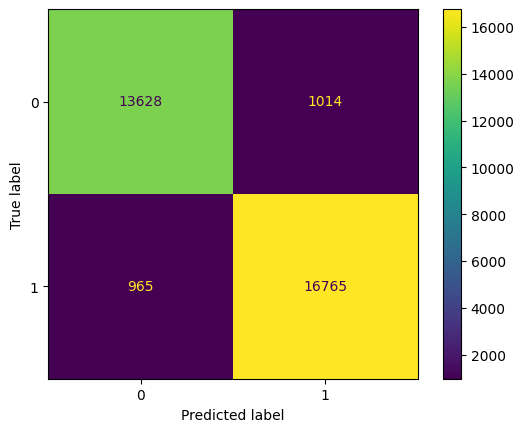

In [86]:
# to know the types of errors made by an algorithm, producing a confusion matrix:
cm = metrics.confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()

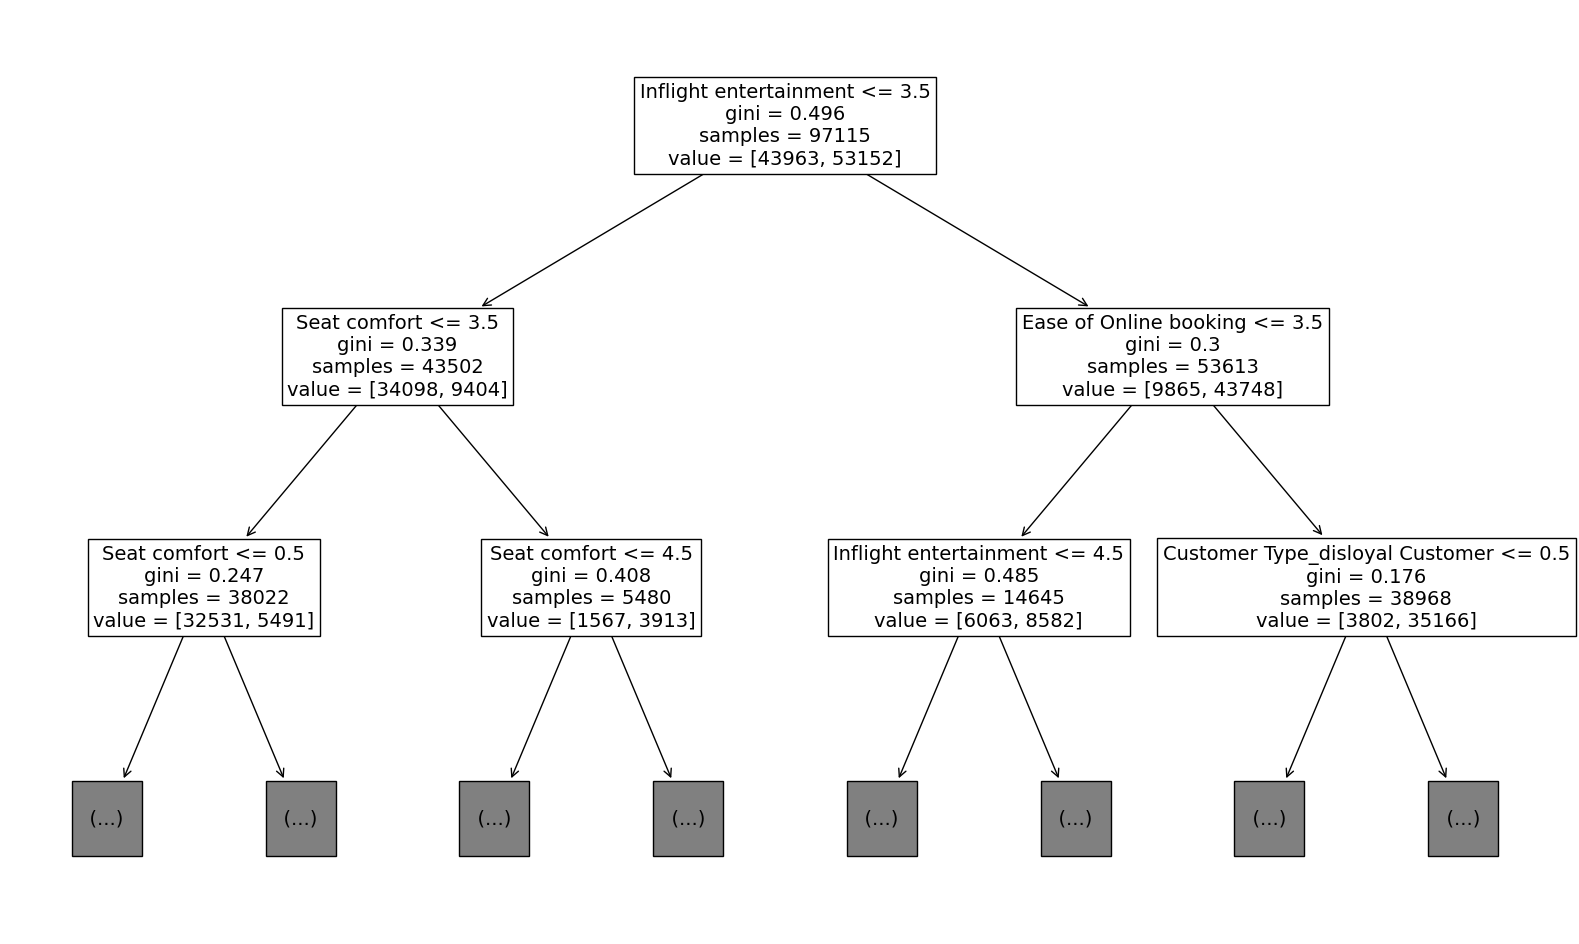

In [87]:
# Decision Tree
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns);